In [1]:
import tensorflow
import tensorflow as tf


from pathlib import Path
import pandas as pd
import numpy as np
#
from datetime import datetime
import os
#
from tensorflow.python.client import device_lib
import platform

In [2]:
#Cell 0

# %cd C:\Users\Developer\MyProjects\ROP_Plus\ROP_Plus_NoPlus



def change_directory(path):
    try:
        # Change to the specified directory
        os.chdir(path)
        print(f"Changed directory to: {os.getcwd()}")
    except FileNotFoundError:
        print(f"The directory {path} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
if __name__ == "__main__":
    # Define the path for both Windows and Linux
    if platform.system() == "Windows":
        path = r"C:\Users\Developer\MyProjects\ROP_Pre-Plus_LightSpec\ROP_LightSpec_Pre-Plus"  # Raw string for Windows
    else:
        path = "/home/developer/Documents/MyProjects/ROP_Pre-Plus_LightSpec/ROP_LightSpec_Pre-Plus"  # Linux path

    change_directory(path)


Changed directory to: C:\Users\Developer\MyProjects\ROP_Pre-Plus_LightSpec\ROP_LightSpec_Pre-Plus


In [3]:
csv_dir = Path('Results/OriginalImageWithoutCBAM/Blue/')
csv_1 = 'CM1' + '.csv'
csv_path1 = csv_dir / csv_1
df_data1 = pd.read_csv(csv_path1)
df_data1
cm11=np.asarray(df_data1.values)
cm11

array([[162,  20,  12],
       [  3,  15,   1],
       [ 42,  20,  65]], dtype=int64)

In [4]:
csv_2 = 'CM2' + '.csv'
csv_path2 = csv_dir / csv_2
df_data2 = pd.read_csv(csv_path2)
df_data2
cm22=np.asarray(df_data2.values)

In [5]:
csv_3 = 'CM3' + '.csv'
csv_path3 = csv_dir / csv_3
df_data3 = pd.read_csv(csv_path3)
df_data3
cm33=np.asarray(df_data3.values)

In [6]:
csv_4 = 'CM4' + '.csv'
csv_path4 = csv_dir / csv_4
df_data4 = pd.read_csv(csv_path4)
df_data4
cm44=np.asarray(df_data4.values)

In [7]:
csv_5 = 'CM5' + '.csv'
csv_path5 = csv_dir / csv_5
df_data5 = pd.read_csv(csv_path5)
df_data5
cm55=np.asarray(df_data5.values)

In [8]:

    
#Cell 21
# Disease      TP      FN
#       True
# Healthy      FP      TN
#         Disease     Healthy
#                Pred

def binAccuracy(mat2D):
    tp = mat2D[0][0]
    tn = mat2D[1][1]
    fp = mat2D[1][0]
    fn = mat2D[0][1]
    res = (tp+tn) / (tp+tn+fp+fn)
    return res

def binSensitivity(mat2D):
    tp = mat2D[0][0]
    tn = mat2D[1][1]
    fp = mat2D[1][0]
    fn = mat2D[0][1]
    res = tp / (tp+fn)
    return res


def binSpecificity(mat2D):
    tp = mat2D[0][0]
    tn = mat2D[1][1]
    fp = mat2D[1][0]
    fn = mat2D[0][1]
    res = tn / (tn+fp)
    return res


In [9]:
# def binAccuracy(mat2D):
#   tp = mat2D[0][0]
#   tn = mat2D[1][1]
#   fp = mat2D[1][0]
#   fn = mat2D[0][1]
#   res = (tp+tn) / (tp+tn+fp+fn)
#   return res

# def binSensitivity(mat2D):
#   tp = mat2D[0][0]
#   tn = mat2D[1][1]
#   fp = mat2D[1][0]
#   fn = mat2D[0][1]
#   res = tp / (tp+fn)
#   return res


# def binSpecificity(mat2D):
#   tp = mat2D[0][0]
#   tn = mat2D[1][1]
#   fp = mat2D[1][0]
#   fn = mat2D[0][1]
#   res = tn / (tn+fp)
#   return res


In [10]:
tabletvst = np.array(([25,3,4],[1,23,0],[9,8,58]))
tabletvst

array([[25,  3,  4],
       [ 1, 23,  0],
       [ 9,  8, 58]])

In [11]:
class_names = ['Normal','Pre-Plus','Plus'] # Used for the confusion matrix at the end
len(class_names)

3

In [12]:
def creat2DConfusionMatrix(categoryIndex, conf_mat, sizeofCategory = class_names):
  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var[0][0] = conf_mat[categoryIndex][categoryIndex]
  # print("mat2D_var[0][0]:  {} {}".format(categoryIndex, categoryIndex))
  for intI in range(0,len(sizeofCategory)):
    if intI != categoryIndex:
      mat2D_var[0][1] += conf_mat[categoryIndex][intI]
      # print("mat2D_var[0][1]:  {} {}".format(categoryIndex, intI))
      mat2D_var[1][0] += conf_mat[intI][categoryIndex]
      # print("mat2D_var[1][0]:  {} {}".format(intI, categoryIndex))

  for intI in range(0,len(sizeofCategory)):
    for intJ in range(0,len(sizeofCategory)):
      if intI != categoryIndex and intJ != categoryIndex:
        mat2D_var[1][1] += conf_mat[intI][intJ]
        # print("mat2D_var[1][1]:  {} {}".format(intI, intJ))

  return mat2D_var


In [13]:
creat2DConfusionMatrix(2,cm11)

array([[ 65,  62],
       [ 13, 200]])

In [14]:
def accuracyCalculator(conf_mat):
  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(0,conf_mat)
  C1_acc = binAccuracy(mat2D_var)

  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(1,conf_mat)
  C2_acc = binAccuracy(mat2D_var)

  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(2,conf_mat)
  C3_acc = binAccuracy(mat2D_var)

#   mat2D_var =np.array(([0,0],[0,0]))
#   mat2D_var = creat2DConfusionMatrix(3,conf_mat)
#   C4_acc = binAccuracy(mat2D_var)

  result = []
#   result.append([C1_acc,C2_acc,C3_acc, C4_acc])
  result.append([C1_acc,C2_acc,C3_acc])

  return np.squeeze(result)
###########################################################
def sensitivityCalculator(conf_mat):
  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(0,conf_mat)
  C1_acc = binSensitivity(mat2D_var)


  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(1,conf_mat)
  C2_acc = binSensitivity(mat2D_var)


  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(2,conf_mat)
  C3_acc = binSensitivity(mat2D_var)

#   mat2D_var =np.array(([0,0],[0,0]))
#   mat2D_var = creat2DConfusionMatrix(3,conf_mat)
#   C4_acc = binSensitivity(mat2D_var)

  result = []
#   result.append([C1_acc,C2_acc,C3_acc, C4_acc])
  result.append([C1_acc,C2_acc,C3_acc])

  return np.squeeze(result)
################################################################
def specificityCalculator(conf_mat):
  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(0,conf_mat)
  C1_acc = binSpecificity(mat2D_var)

  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(1,conf_mat)
  C2_acc = binSpecificity(mat2D_var)

  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(2,conf_mat)
  C3_acc = binSpecificity(mat2D_var)

#   mat2D_var =np.array(([0,0],[0,0]))
#   mat2D_var = creat2DConfusionMatrix(3,conf_mat)
#   C4_acc = binSpecificity(mat2D_var)

  result = []
#   result.append([C1_acc,C2_acc,C3_acc, C4_acc])
  result.append([C1_acc,C2_acc,C3_acc])

  return np.squeeze(result)


In [15]:
cm11

array([[162,  20,  12],
       [  3,  15,   1],
       [ 42,  20,  65]], dtype=int64)

In [16]:
accuracyCalculator(cm11)

array([0.77352941, 0.87058824, 0.77941176])

In [17]:
sensitivityCalculator(cm11)

array([0.83505155, 0.78947368, 0.51181102])

In [18]:
specificityCalculator(cm11)

array([0.69178082, 0.87538941, 0.93896714])

In [19]:
# def accuracyCalculator(conf_mat):
#   result = np.zeros(len(conf_mat))
#   for i in range(0,len(conf_mat)):
#     res=np.sum(conf_mat[i,:])
#     result[i] = conf_mat[i][i]/res
#   return result

In [20]:
# def sensitivityCalculator(conf_mat):
#   result = np.zeros(len(conf_mat))
#   for i in range(0,len(conf_mat)):
#     res=np.sum(conf_mat[:,i])
#     res = conf_mat[i][i]/res
#     result[i] = res
#   return result


In [21]:
# def specificityCalculator(conf_mat):
#   tn = np.zeros(3)
#   fp = np.zeros(3)
#   sp = np.zeros(3)
#   tn[0]= conf_mat[1][1]+conf_mat[1][2]+conf_mat[2][1]+conf_mat[2][2]
#   fp[0]= conf_mat[0][1]+conf_mat[0][2]

#   tn[1]= conf_mat[0][0]+conf_mat[0][2]+conf_mat[2][0]+conf_mat[2][2]
#   fp[1]= conf_mat[1][0]+conf_mat[1][2]

#   tn[2]= conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1]
#   fp[2]= conf_mat[2][0]+conf_mat[2][1]

#   sp = tn/(tn+fp)
#   return sp


In [22]:
accCM1=accuracyCalculator(cm11)
senCM1=sensitivityCalculator(cm11)
speCM1=specificityCalculator(cm11)

In [23]:
accCM2=accuracyCalculator(cm22)
senCM2=sensitivityCalculator(cm22)
speCM2=specificityCalculator(cm22)

In [24]:
accCM3=accuracyCalculator(cm33)
senCM3=sensitivityCalculator(cm33)
speCM3=specificityCalculator(cm33)

In [25]:
accCM4=accuracyCalculator(cm44)
senCM4=sensitivityCalculator(cm44)
speCM4=specificityCalculator(cm44)

In [26]:
accCM5=accuracyCalculator(cm55)
senCM5=sensitivityCalculator(cm55)
speCM5=specificityCalculator(cm55)

In [27]:
np.squeeze(accCM1)

array([0.77352941, 0.87058824, 0.77941176])

In [28]:
cm11

array([[162,  20,  12],
       [  3,  15,   1],
       [ 42,  20,  65]], dtype=int64)

In [29]:
accTot= accCM1 + accCM2 + accCM3 + accCM4+ accCM5
resultAcc = accTot/5
print(resultAcc)
accAvg = np.mean(resultAcc)
print(accAvg)
print(np.std(resultAcc))

[0.78352941 0.91058824 0.77882353]
0.824313725490196
0.06103553398696068


In [30]:
senTot= senCM1 + senCM2 + senCM3 + senCM4+ senCM5
resultsen = senTot/5
print(resultsen)
senAvg = np.mean(resultsen)
print(senAvg)
print(np.std(resultsen))

[0.79817605 0.64315789 0.65633046]
0.6992214680609586
0.07017780364742386


In [31]:
speTot= speCM1 + speCM2 + speCM3 + speCM4+ speCM5
resultspe = speTot/5
print(resultspe)
speAvg = np.mean(resultspe)
print(speAvg)
print(np.std(resultspe))

[0.76415683 0.92699182 0.85134483]
0.847497825741951
0.06653274189648066


Another Way to Calculate the mean

In [32]:
# speTot= speCM1 + speCM2 + speCM3 + speCM4+ speCM5
# resultspe = np.asarray([speCM1,speCM2,speCM3,speCM4,speCM5])

# speAvg = np.mean(resultspe)
# print(resultspe)
# print(speAvg)
# print(np.std(resultspe))

In [33]:
accCM1

array([0.77352941, 0.87058824, 0.77941176])

In [34]:
accGroup1 = np.asarray([accCM1[0],accCM2[0],accCM3[0],accCM4[0],accCM5[0]])
accGroup2 = np.asarray([accCM1[1],accCM2[1],accCM3[1],accCM4[1],accCM5[1]])
accGroup3 = np.asarray([accCM1[2],accCM2[2],accCM3[2],accCM4[2],accCM5[2]])
# accGroup4 = np.asarray([accCM1[3],accCM2[3],accCM3[3],accCM4[3],accCM5[3]])

print(np.mean(accGroup1),'   ',np.mean(accGroup2),'   ',np.mean(accGroup3), '   ')
print(np.std(accGroup1),'   ',np.std(accGroup2),'   ',np.std(accGroup3),'   ')
print((np.mean(accGroup1)+np.mean(accGroup2)+np.mean(accGroup3))/len(class_names))
print((np.std(accGroup1)+np.std(accGroup2)+np.std(accGroup3))/len(class_names))

0.7835294117647058     0.9105882352941176     0.7788235294117647    
0.010620864756039865     0.031104244862123015     0.009913117380207446    
0.824313725490196
0.017212742332790108


In [35]:
senGroup1 = np.asarray([senCM1[0],senCM2[0],senCM3[0],senCM4[0],senCM5[0]])
senGroup2 = np.asarray([senCM1[1],senCM2[1],senCM3[1],senCM4[1],senCM5[1]])
senGroup3 = np.asarray([senCM1[2],senCM2[2],senCM3[2],senCM4[2],senCM5[2]])
# senGroup4 = np.asarray([senCM1[3],senCM2[3],senCM3[3],senCM4[3],senCM5[3]])

print(np.mean(senGroup1),'   ',np.mean(senGroup2),'   ',np.mean(senGroup3),'   ')
print(np.std(senGroup1),'   ',np.std(senGroup2),'   ',np.std(senGroup3),'   ')
print((np.mean(senGroup1)+np.mean(senGroup2)+np.mean(senGroup3))/len(class_names))
print((np.std(senGroup1)+np.std(senGroup2)+np.std(senGroup3))/len(class_names))

0.7981760507533704     0.6431578947368422     0.6563304586926634    
0.028059961955518065     0.08604257143834669     0.08774993335886692    
0.6992214680609586
0.06728415558424389


In [36]:
speGroup1 = np.asarray([speCM1[0],speCM2[0],speCM3[0],speCM4[0],speCM5[0]])
speGroup2 = np.asarray([speCM1[1],speCM2[1],speCM3[1],speCM4[1],speCM5[1]])
speGroup3 = np.asarray([speCM1[2],speCM2[2],speCM3[2],speCM4[2],speCM5[2]])
# speGroup4 = np.asarray([speCM1[3],speCM2[3],speCM3[3],speCM4[3],speCM5[3]])

print(np.mean(speGroup1),'   ',np.mean(speGroup2),'   ',np.mean(speGroup3),'   ')
print(np.std(speGroup1),'   ',np.std(speGroup2),'   ',np.std(speGroup3),'   ')
print((np.mean(speGroup1)+np.mean(speGroup2)+np.mean(speGroup3))/len(class_names))
print((np.std(speGroup1)+np.std(speGroup2)+np.std(speGroup3))/len(class_names))

0.7641568256967408     0.9269918224299065     0.8513448290992057    
0.05214296409567203     0.03523079670302958     0.056559746376344845    
0.847497825741951
0.04797783572501549


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from contextlib import contextmanager

@contextmanager
def change_dir(destination, source = os.getcwd()):
    try:
        cwd = source
        os.chdir(destination)
        yield
    finally:
        os.chdir(cwd)

# plt.figure(figsize=(50, 50))


# data222=[np.append(resultAcc,accAvg),np.append(resultsen,senAvg),np.append(resultspe,speAvg)]

data222=[np.append(resultAcc,accAvg),np.append(resultsen,senAvg),np.append(resultspe,speAvg)]

data=np.around(np.multiply(data222,100), decimals=3)
# data=[[1,2,3],
#       [5,6,7],
#       [8,9,10]]

In [38]:
data222

[array([0.78352941, 0.91058824, 0.77882353, 0.82431373]),
 array([0.79817605, 0.64315789, 0.65633046, 0.69922147]),
 array([0.76415683, 0.92699182, 0.85134483, 0.84749783])]

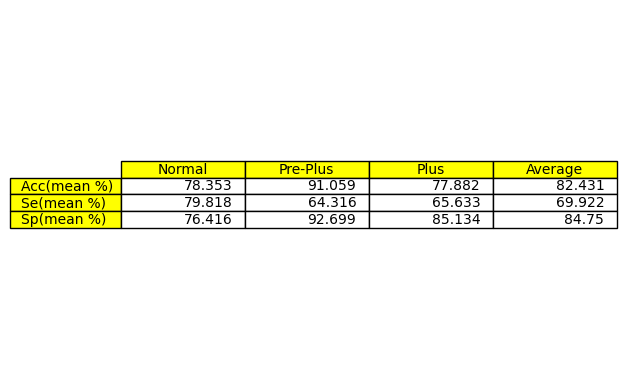

In [39]:
fig, ax =plt.subplots(1,1)
class_names = ['Normal','Pre-Plus','Plus'] # Used for the confusion matrix at the end
column_labels = class_names + ['Average']

rowLabels=["Acc(mean %)","Se(mean %)","Sp(mean %)"]

df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,
        colLabels=df.columns,
        rowLabels=rowLabels,
        rowColours =["yellow"] * 3,
        colColours =["yellow"] * 5,
        loc="center")

# plt.show()
# newDir = os.path.join(os.getcwd(),'tvst')
with change_dir(csv_dir):
    plt.savefig('Table.png',bbox_inches='tight',dpi = 150)
    df= df.rename(index= {0: rowLabels[0], 1: rowLabels[1], 2: rowLabels[2]})
    df.to_csv('Table.csv', index= True)



In [40]:
# CmSaveTotal = cm11+cm22+cm33+cm44+cm55

In [41]:
# df_CmSaveTotal=pd.DataFrame(CmSaveTotal)
# df_CmSaveTotal.to_csv('tvst/df_CmSaveTotal.csv')

OSError: Cannot save file into a non-existent directory: 'tvst'